#### Testing the NWB conversion and exploring the results

---

HOW TO GET STARTED:
1) Anaconda is installed
2) Open anaconda terminal
3) Enter the following in your anaconda prompt

    `conda create -n spell python==3.9`

    `conda activate spell`

    `pip install suite2p`

    `pip install pynwb`
    
    `pip install scipy`    

These are the packages/modules needed

In [1]:
from pynwb import NWBHDF5IO
import nwbwidgets
import os;
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# custom code
path_added = os.path.split(os.path.split(os.getcwd())[0])[0]; os.chdir(path_added); print("Added path:",path_added)
import rootfun as rf # we can import this if our cwd is local
import nwbfun
import plotters
root = rf.dropbox_root(dropbox_folder='timspellman')

Added path: c:\Users\johnj\SpellmanLab Dropbox\timspellman\Python\John\PySpell\code


In the NWBfile widget, select:
>processing > deconvolved > ROI 129 > Col to filter set to choiceOutcome > choiceOutome set to 1 > row faceting set to setShiftingID > align to start time > -10s to 10s

In [2]:
# get root and test .nwb data
nwbpath = os.path.join(root,r"timspellman\Python\John\PySpell\code\Projects\Test Data\t284_SEDS2_L5.nwb")

# read
io = NWBHDF5IO(nwbpath, mode="r") # read in editor mode
nwbfile = io.read()
nwbwidgets.nwb2widget(nwbfile)

c:\Users\johnj\anaconda3\envs\spellPy\lib\site-packages\traitlets\traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(IntText).__init__(min=0).
object.__init__() takes exactly one argument (the instance to initialize)
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(
c:\Users\johnj\anaconda3\envs\spellPy\lib\site-packages\traitlets\traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Dropdown).__init__(description_tooltipw='plane0 column to plot').
object.__init__() takes exactly one argument (the instance to initialize)
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(
c:\Users\johnj\anaconda3\envs\spellPy\lib\site-packages\nwbwidgets\timeseries.py:1271: DeprecationWarning: the description_tooltip argument is deprecated, use tooltip instead
  self.start_time_shift_widget = widgets.FloatText(
c:\Users\johnj\anaconda3\envs\spell

Get all data organized by trials!

In [3]:
trial_data = nwbfile.trials.to_dataframe()
trial_data

,start_time,stop_time,trialStartIdx,trialEndIdx,LickCountsL,LickCountsR,irrelevantLR,relevantLR,setShiftingID,choiceOutcome,trialRewarded,trialDuration,stimDuration,trialRewardTimesIdx,trialRewardTimes,stimulusOnsetIdx,stimulusOnsetTime,stimulusOffsetIdx,stimulusOffsetTime,timeseries
id,,,,,,,,,,,,,,,,,,,,
0,6.667099,9.333938,20,28,12,20,1,0,0,1,1,2.666667,1.666775,28.0,9.333938,21,7.000453,26,8.667228,"[(20, 8, frameTimes pynwb.base.TimeSeries at 0..."
1,17.001101,19.667941,51,59,2,43,0,1,0,1,1,2.666667,1.666775,59.0,19.667941,52,17.334456,57,19.001231,"[(51, 8, frameTimes pynwb.base.TimeSeries at 0..."
2,27.335104,29.668589,82,89,0,28,1,1,0,1,1,2.333333,1.666775,89.0,29.668589,83,27.668459,88,29.335234,"[(82, 7, frameTimes pynwb.base.TimeSeries at 0..."
3,36.335687,39.002527,109,117,1,44,1,0,0,0,0,2.666667,1.666775,NaN,NaN,110,36.669042,115,38.335817,"[(109, 8, frameTimes pynwb.base.TimeSeries at ..."
4,46.002980,48.669819,138,146,3,23,1,0,0,1,1,2.666667,1.666775,145.0,48.336465,139,46.336335,144,48.003110,"[(138, 8, frameTimes pynwb.base.TimeSeries at ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,5059.661095,5063.661354,15178,15190,0,0,0,0,1,0,0,4.000000,1.666775,NaN,NaN,15180,5060.327805,15185,5061.994580,"[(15178, 12, frameTimes pynwb.base.TimeSeries ..."
517,5071.328518,5074.995422,15213,15224,0,0,1,0,1,1,1,3.666667,1.666775,15224.0,5074.995422,15214,5071.661873,15219,5073.328647,"[(15213, 11, frameTimes pynwb.base.TimeSeries ..."
518,5081.995875,5085.662780,15245,15256,0,0,0,1,1,1,1,3.666667,1.666775,15256.0,5085.662780,15246,5082.329230,15251,5083.996005,"[(15245, 11, frameTimes pynwb.base.TimeSeries ..."


c:\Users\johnj\anaconda3\envs\spellPy\lib\site-packages\pynwb\base.py:203: UserWarning:

IntervalSeries 'lick_times_all_index': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension

c:\Users\johnj\anaconda3\envs\spellPy\lib\site-packages\pynwb\base.py:203: UserWarning:

IntervalSeries 'lick_times_left_index': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension

c:\Users\johnj\anaconda3\envs\spellPy\lib\site-packages\pynwb\base.py:203: UserWarning:

IntervalSeries 'lick_times_right_index': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension

c:\Users\johnj\anaconda3\envs\spellPy\lib\site-packages\pynwb\base.py:203: UserWarning:

IntervalSeries 'reward_time_index': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension

c:\Users\johnj\a

array([219.96844, 220.75449, 210.96172, 212.24966, 198.7678 , 224.01604,
       204.75172, 206.20505, 200.48834, 200.23535, 199.84694, 238.21121,
       274.42926, 298.00012, 340.3324 ], dtype=float32)

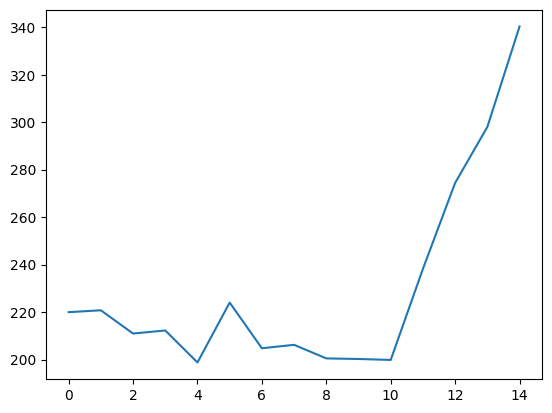

In [3]:
# fact check above
io.close()
io = NWBHDF5IO(nwbpath, mode="r") # read in editor mode
nwbfile = io.read()

import matplotlib.pyplot as plt
F = nwbfile.processing['ophys']['Fluorescence'].roi_response_series['plane0'].data[:]
plt.plot(F[0:3*5,0])
F[0:3*5,0]

# Validating results above

The NWB file has a generated Timestamps variable to relate all data. This is from timepoint 0 to numsize data/srate and is fit to the amount of datapoints.

We need to validate that this was done correctly by using the raw data.

Also, we need to validate that behavioral metric alignment is accurate. So we will use raw data and compare

Compare this to what you see above. Please read the writing in these boxes to figure out how to compare.

>processing > deconvolved > ROI 129 > Col to filter set to choiceOutcome > choiceOutome set to 1 > row faceting set to setShiftingID > align to start time > -10s to 10s

We are extracting data from ROI 129, during correct choices from both set shifts, aligned to -10s to +10s around trial start time

In [3]:
# paths for data
fpath = os.path.join(root,r"timspellman\Imaging\PFCMDTReanalysis\Imaging\t284\SEDS2\suite2p\plane0")
bpath = os.path.join(root,r"timspellman\Behavior2P_Archive\t284\SEDS2Beh.mat")

# load suite2p variables
ops      = np.load(os.path.join(fpath,'ops.npy'), allow_pickle=True).item(); ops.keys() == ops.keys() # options
stat     = np.load(os.path.join(fpath,'stat.npy'),allow_pickle=True) # statistics
iscell   = np.load(os.path.join(fpath,'iscell.npy'),allow_pickle=True)[:, 0].astype(bool) # index for cell or not
F        = np.load(os.path.join(fpath,'F.npy'),allow_pickle=True) # f of cells
Fneu     = np.load(os.path.join(fpath,'Fneu.npy'),allow_pickle=True) # f of neuropil
spks     = np.load(os.path.join(fpath,'spks.npy'),allow_pickle=True) # spk via deconvolution

# load behavior
behdata = sio.loadmat(bpath)

# get starttimes
deconvolved_starttimes = np.squeeze(spks[:,behdata['trialStartTimes'][0]])
setshiftIDs = behdata['setIDs'][0]
dec_shift0 = deconvolved_starttimes[:,setshiftIDs==0]
dec_shift1 = deconvolved_starttimes[:,setshiftIDs==1]

# time around starttime and set shifting context
correctShifts = setshiftIDs[behdata['trialCorrect'][0]==1] # 0s mean context 0, 1s mean context 1, all correct trials
trialAlignedStart0 = behdata['trialStartTimes'][0][behdata['trialCorrect'][0]==1][correctShifts==0]
trialAlignedStart1 = behdata['trialStartTimes'][0][behdata['trialCorrect'][0]==1][correctShifts==1]

# time around
time_around = np.array([10, 10]) # seconds around (first is -, second is +)
samples_around = time_around*int(ops['fs'])

# go through trialAligned data to create a PSTH
start0s = np.array([i-samples_around[0] for i in trialAlignedStart0])
end0s   = np.array([i+samples_around[0] for i in trialAlignedStart0])
start1s = np.array([i-samples_around[0] for i in trialAlignedStart1])
end1s   = np.array([i+samples_around[0] for i in trialAlignedStart1])

# get data in list
psth0 = []; psth1 = []
for i in range(len(start0s)):
    if start0s[i] > 0:
        psth0.append(spks[:,start0s[i]:end0s[i]])
for i in range(len(start1s)):
    if start1s[i] > 0:
        try:
            psth1.append(spks[:,start1s[i]:end1s[i]])
        except:
            pass

# 3D array (trials x unit x time)
psth0 = np.array(psth0)
psth1 = np.array(psth1)

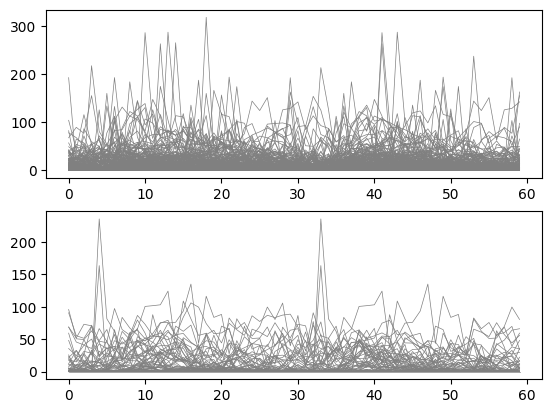

In [4]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
for triali in range(psth0.shape[0]):
    ax[0].plot(psth0[triali,129,:],color='gray',linewidth=0.5)
for triali in range(psth1.shape[0]):
    ax[1].plot(psth1[triali,129,:],color='gray',linewidth=0.5)
        

Another validation: set `ROI` to 66, `coltofilter` at `trialRewardTimes`, `trialRewardTimes` to 77.0049, align to start_time, time_around: -5 to 5s. Make sure you are viewing the `Deconvolved` signal

End trial shaved off


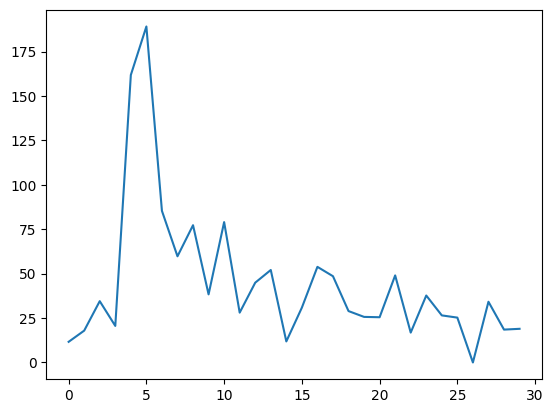

In [35]:
from matpy import generateTrialTimes_spellmanData as genTimes
from copy import deepcopy

# reorganize data
spkdata = spks[66] # component 66
behdict = genTimes(matpath=bpath) # a function that helps with behavioral variable curation
timestamps = np.linspace(0,len(behdict['frameTimes'][0])/ops['fs'],len(behdict['frameTimes'][0])) # a timestamps variable from 0

# a for loop that extracts reward times per trial
times_rewarded = deepcopy(behdict['trialRewardTimesAll'])
for i in range(len(behdict['trialRewardTimesAll'])):
    try:
        times_rewarded[i]=timestamps[int(behdict['trialRewardTimesAll'][i])]
    except:
        pass

# find 77s time - this is an index to reference back to the signal data
time_marker = [int(behdict['trialRewardTimesAll'][i]) for i in range(len(times_rewarded)) if np.round(times_rewarded[i])==77][0]

# get data around
data_around = spkdata[time_marker-(int(ops['fs']*5)):time_marker+(int(ops['fs']*5))]

plt.plot(data_around)

### Using the custom `plotters` function to get combinations of inputs for SEDS

In [3]:
nwbpath = os.path.join(root,r"timspellman\Python\John\PySpell\code\Projects\Test Data\t284_SEDS2_L5.nwb")
stat, ops, F, Fneu, spks, iscell, probcell, redcell, probredcell = nwbfun.suite2p_nwb().read_nwb(fpath=nwbpath);
behdict = nwbfun.unwrap().spellmanBeh(nwbpath=nwbpath)
time_around=[10,10] # time around event marker for PETH

# this should be under a different function name
peth = plotters.seds_peth(neural_data = spks[iscell,:], fs=ops['fs'], behdata=behdict, time_around=[10,10]);

trialStartTimes detected
rewardTimes detected
stimOnTimes detected
stimOffTimes detected
lickTimesL detected
lickTimesR detected


The attributes of `peth` represent how the neural data is centered.

`peth['stimOnTimestrialCorrect']` provides a view of the neural data surrounding stimulus onset, but specifically on correct trials

The `shape` of `peth` is the following: `(TRIALS, COMPONENTS, TIMEPOINTS)`

---

Lets look at one component

Text(0.5, 1.0, 'Incorrect trials')

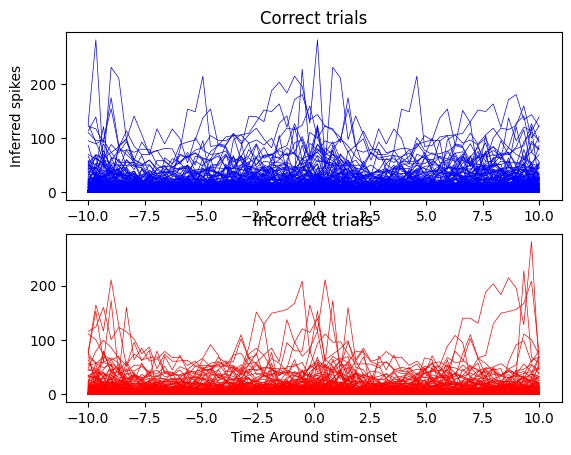

In [7]:
# number of components and number of times are fixed
num_components = peth['stimOnTimestrialCorrect'].shape[1]
num_times      = peth['stimOnTimestrialCorrect'].shape[2]

# using the number of time points and the known `time_around` used in `seds_peth`, we can create an x-axis
x_axis = np.linspace(-time_around[0],time_around[1],num_times)

# number of trials varies with variable
num_trials = peth['stimOnTimestrialCorrect'].shape[0]
num_trials_inc = peth['stimOnTimestrialIncorrect'].shape[0]

# create a figure object to assign our data to
fig, ax = plt.subplots(nrows=2, ncols=1)

# plot
for i in range(num_trials):
    ax[0].plot(x_axis,peth['stimOnTimestrialCorrect'][i,100,:],color='blue',linewidth=0.5)

for i in range(num_trials_inc):
    ax[1].plot(x_axis,peth['stimOnTimestrialIncorrect'][i,100,:],color='red',linewidth=0.5)

ax[0].set_ylabel("Inferred spikes")
ax[0].set_title("Correct trials")
ax[1].set_xlabel("Time Around stim-onset")
ax[1].set_title("Incorrect trials")

Now lets compare the results above to what we would see if we generated things with the raw data

In [8]:
import scipy.io as sio

# paths for data
fpath = os.path.join(root,r"timspellman\Imaging\PFCMDTReanalysis\Imaging\t284\SEDS2\suite2p\plane0")
bpath = os.path.join(root,r"timspellman\Behavior2P_Archive\t284\SEDS2Beh.mat")

# load suite2p variables
ops      = np.load(os.path.join(fpath,'ops.npy'), allow_pickle=True).item(); ops.keys() == ops.keys() # options
stat     = np.load(os.path.join(fpath,'stat.npy'),allow_pickle=True) # statistics
iscell   = np.load(os.path.join(fpath,'iscell.npy'),allow_pickle=True)[:, 0].astype(bool) # index for cell or not
F        = np.load(os.path.join(fpath,'F.npy'),allow_pickle=True)    # f of cells
Fneu     = np.load(os.path.join(fpath,'Fneu.npy'),allow_pickle=True) # f of neuropil
spks     = np.load(os.path.join(fpath,'spks.npy'),allow_pickle=True) # spk via deconvolution

# load behavior
behdict = sio.loadmat(bpath)
time_around=[10,10] # time around event marker for PETH
fs = 3.0

# this should be under a different function name
peth_onraw = plotters.seds_peth(neural_data = spks[iscell,:], fs=fs, behdata=behdict, time_around=[10,10]);

trialStartTimes detected
rewardTimes detected
stimOnTimes detected
stimOffTimes detected
lickTimesL detected
lickTimesR detected


Using the same exact code as above, we can see that the plots are the same

Text(0.5, 1.0, 'Incorrect trials')

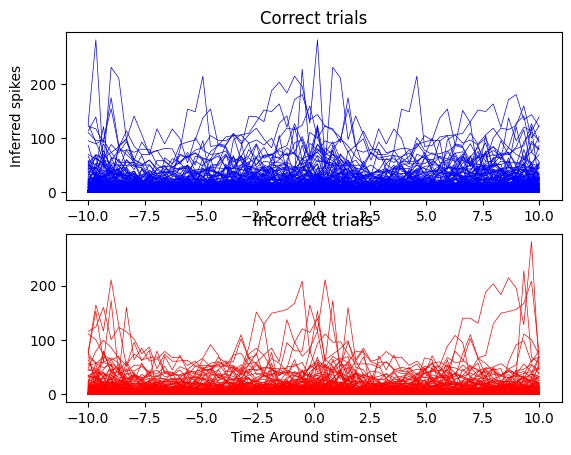

In [9]:
# number of components and number of times are fixed
num_components = peth_onraw['stimOnTimestrialCorrect'].shape[1]
num_times      = peth_onraw['stimOnTimestrialCorrect'].shape[2]

# using the number of time points and the known `time_around` used in `seds_peth`, we can create an x-axis
x_axis = np.linspace(-time_around[0],time_around[1],num_times)

# number of trials varies with variable
num_trials = peth_onraw['stimOnTimestrialCorrect'].shape[0]
num_trials_inc = peth_onraw['stimOnTimestrialIncorrect'].shape[0]

# create a figure object to assign our data to
fig, ax = plt.subplots(nrows=2, ncols=1)

# plot
for i in range(num_trials):
    ax[0].plot(x_axis,peth_onraw['stimOnTimestrialCorrect'][i,100,:],color='blue',linewidth=0.5)

for i in range(num_trials_inc):
    ax[1].plot(x_axis,peth_onraw['stimOnTimestrialIncorrect'][i,100,:],color='red',linewidth=0.5)

ax[0].set_ylabel("Inferred spikes")
ax[0].set_title("Correct trials")
ax[1].set_xlabel("Time Around stim-onset")
ax[1].set_title("Incorrect trials")

As an added sanity check, lets directly compare the plots by subtracting the NWB from the raw data files

The results should be **A FLAT LINE!!**

Text(0.5, 1.0, 'Sanity checking NWB conversion against raw data. Look for flat line')

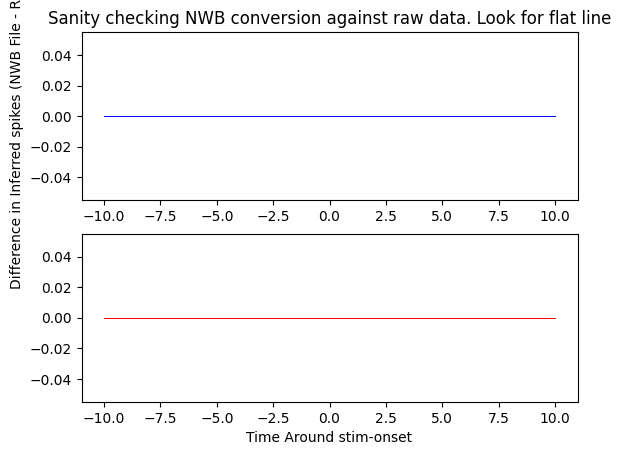

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1)

# plot
for i in range(num_trials):
    ax[0].plot(x_axis,peth['stimOnTimestrialCorrect'][i,100,:]-peth_onraw['stimOnTimestrialCorrect'][i,100,:],color='blue',linewidth=0.5)

for i in range(num_trials_inc):
    ax[1].plot(x_axis,peth['stimOnTimestrialIncorrect'][i,100,:]-peth_onraw['stimOnTimestrialIncorrect'][i,100,:],color='red',linewidth=0.5)

ax[0].set_ylabel("Difference in Inferred spikes (NWB File - RAW File)")
ax[1].set_xlabel("Time Around stim-onset")
ax[0].set_title("Sanity checking NWB conversion against raw data. Look for flat line")